### Required Libraries and Modules
We import essential libraries and custom framework modules for data preprocessing, PCA, training, evaluation, and hyperparameter search.

In [26]:
import numpy as np
import pandas as pd
from framework.train import train_model
from framework.preprocess import load_data, preprocess_data
from framework.pca import apply_existing_pca, visualize_pca_explained_variance
from framework.evaluation import classification_report
from framework.hyperparameter_search import HyperparameterSearch

For this demo we added mandatory gesture maps to integer labels used in classification.

In [20]:
gesture_map = {
    "swipe_left": 0,
    "swipe_right": 1,
    "rotate": 2,
    "idle": 3
}

We load the raw dataset and applies preprocessing steps such as cleaning, scaling, or reshaping. 

In [27]:
# Load raw training and validation data from separate folders.
combined_train_df = load_data(data_dir="data/mandatory/train")
combined_val_df = load_data(data_dir="data/mandatory/validation")

# Set PCA parameter (e.g., capture 99.9% of variance).
components_or_variance = 0.999  
# Preprocess training data and fit PCA.
X_train, y_train, pca_params_train = preprocess_data(
    combined_train_df, 
    components_or_variance=components_or_variance, 
    gesture_map=gesture_map
)

# Preprocess validation data (without PCA), then apply the PCA transformation.
X_val, y_val, _ = preprocess_data(
    combined_val_df, 
    components_or_variance=None, 
    gesture_map=gesture_map
)
X_val = apply_existing_pca(X_val, pca_params_train)

Feature columns used for training: ['nose_x', 'nose_y', 'nose_z', 'nose_confidence', 'left_eye_inner_x', 'left_eye_inner_y', 'left_eye_inner_z', 'left_eye_inner_confidence', 'left_eye_x', 'left_eye_y', 'left_eye_z', 'left_eye_confidence', 'left_eye_outer_x', 'left_eye_outer_y', 'left_eye_outer_z', 'left_eye_outer_confidence', 'right_eye_inner_x', 'right_eye_inner_y', 'right_eye_inner_z', 'right_eye_inner_confidence', 'right_eye_x', 'right_eye_y', 'right_eye_z', 'right_eye_confidence', 'right_eye_outer_x', 'right_eye_outer_y', 'right_eye_outer_z', 'right_eye_outer_confidence', 'left_ear_x', 'left_ear_y', 'left_ear_z', 'left_ear_confidence', 'right_ear_x', 'right_ear_y', 'right_ear_z', 'right_ear_confidence', 'left_mouth_x', 'left_mouth_y', 'left_mouth_z', 'left_mouth_confidence', 'right_mouth_x', 'right_mouth_y', 'right_mouth_z', 'right_mouth_confidence', 'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z', 'left_shoulder_confidence', 'right_shoulder_x', 'right_shoulder_y', 'right_s

### Model Training  
We can train a neural network using the training and validation datasets.  
You can adjust key hyperparameters to improve performance, including:
- `epochs`
- `batch_size`
- `learning_rate`
- `hidden_dim`
- `n_layers`
- `reg_lambda`

These settings control how the model learns and generalizes, so tuning them can significantly affect results.


In [28]:
trained_model, history = train_model(
        X_train, y_train, X_val, y_val,
        epochs=50,
        batch_size=32,
        learning_rate=0.1,
        hidden_dim=[64, 64, 32],  
        n_layers=3,
        reg_lambda=0.001,
        loss_function="cross_entropy",
        pca_params=pca_params_train  
    )

PCA parameters saved to models/pca_params.pkl
PCA parameters saved to models/pca_params.pkl
Epoch 1/50 - Loss: 0.6837 - Train Acc: 0.8354 - Val Acc: 0.8377
Epoch 2/50 - Loss: 0.5223 - Train Acc: 0.7853 - Val Acc: 0.7306
Epoch 3/50 - Loss: 0.4915 - Train Acc: 0.8660 - Val Acc: 0.8407
Epoch 4/50 - Loss: 0.4717 - Train Acc: 0.8617 - Val Acc: 0.8342
Epoch 5/50 - Loss: 0.4571 - Train Acc: 0.8439 - Val Acc: 0.8288
Epoch 6/50 - Loss: 0.4437 - Train Acc: 0.8607 - Val Acc: 0.8380
Epoch 7/50 - Loss: 0.4343 - Train Acc: 0.8675 - Val Acc: 0.8342
Epoch 8/50 - Loss: 0.4229 - Train Acc: 0.8733 - Val Acc: 0.8568
Epoch 9/50 - Loss: 0.4110 - Train Acc: 0.8900 - Val Acc: 0.8622
Epoch 10/50 - Loss: 0.4019 - Train Acc: 0.8680 - Val Acc: 0.8226
Epoch 11/50 - Loss: 0.3958 - Train Acc: 0.8781 - Val Acc: 0.8342
Epoch 12/50 - Loss: 0.3866 - Train Acc: 0.7039 - Val Acc: 0.7466
Epoch 13/50 - Loss: 0.3870 - Train Acc: 0.8227 - Val Acc: 0.8342
Epoch 14/50 - Loss: 0.3828 - Train Acc: 0.8215 - Val Acc: 0.8063
Epoch 1

### Hyperparameter Search  
Defines a grid of hyperparameters (`param_grid`) and performs a search to find the best model configuration using the `HyperparameterSearch` class.

Key parameters being tuned include:
- `learning_rate`
- `hidden_dim`
- `reg_lambda`
- `epochs`
- `n_layers`
- `loss_function`
- `batch_size`

The search runs through combinations of these values, evaluates each model, and identifies the best performing setup.  
Finally, the best configuration is printed and training histories are visualized.


Feature columns used for training: ['nose_x', 'nose_y', 'nose_z', 'nose_confidence', 'left_eye_inner_x', 'left_eye_inner_y', 'left_eye_inner_z', 'left_eye_inner_confidence', 'left_eye_x', 'left_eye_y', 'left_eye_z', 'left_eye_confidence', 'left_eye_outer_x', 'left_eye_outer_y', 'left_eye_outer_z', 'left_eye_outer_confidence', 'right_eye_inner_x', 'right_eye_inner_y', 'right_eye_inner_z', 'right_eye_inner_confidence', 'right_eye_x', 'right_eye_y', 'right_eye_z', 'right_eye_confidence', 'right_eye_outer_x', 'right_eye_outer_y', 'right_eye_outer_z', 'right_eye_outer_confidence', 'left_ear_x', 'left_ear_y', 'left_ear_z', 'left_ear_confidence', 'right_ear_x', 'right_ear_y', 'right_ear_z', 'right_ear_confidence', 'left_mouth_x', 'left_mouth_y', 'left_mouth_z', 'left_mouth_confidence', 'right_mouth_x', 'right_mouth_y', 'right_mouth_z', 'right_mouth_confidence', 'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z', 'left_shoulder_confidence', 'right_shoulder_x', 'right_shoulder_y', 'right_s

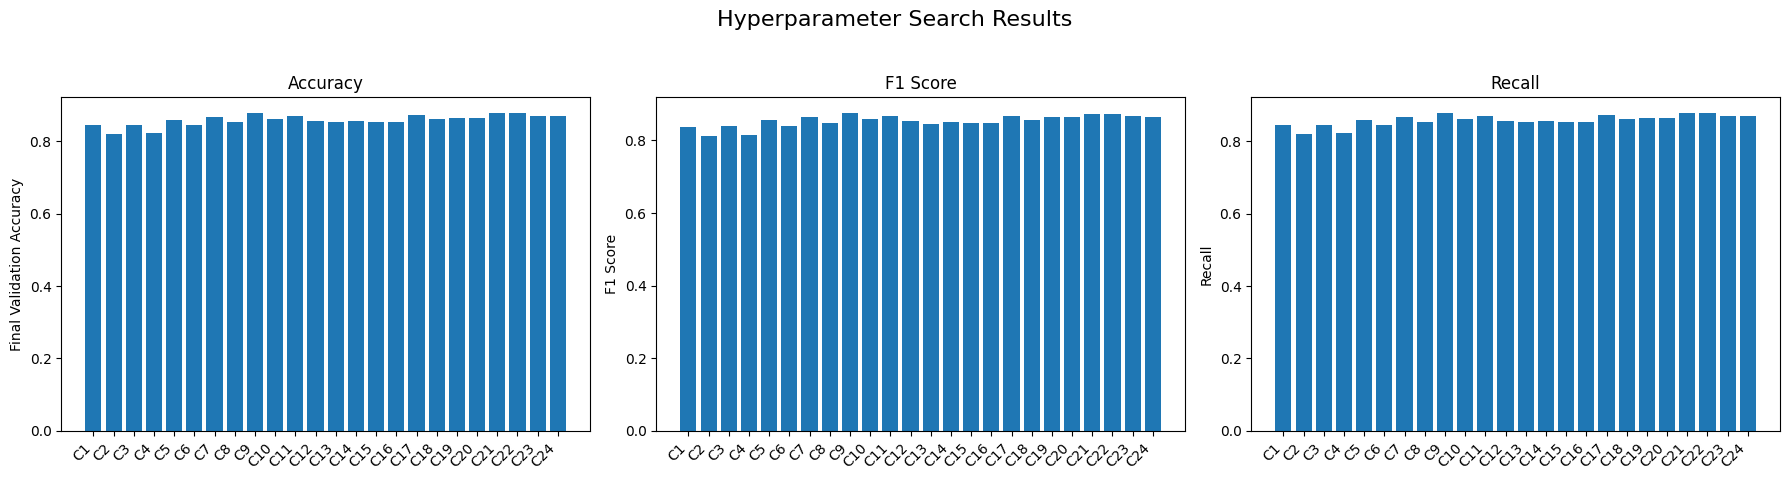

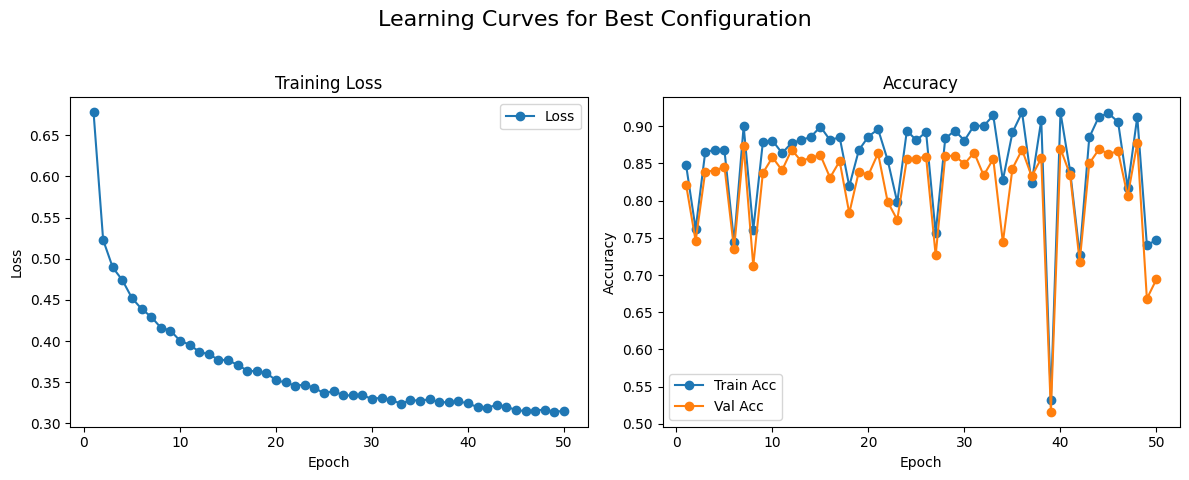

In [31]:
param_grid = {
    'learning_rate': [0.01, 0.1],
    'hidden_dim': [[64, 64, 32]],
    'reg_lambda': [0.001],
    'epochs': [10, 30, 50],
    'n_layers': [3],
    'loss_function': ['cross_entropy', 'mse'],
    'batch_size': [32, 64]
}

# Create a HyperparameterSearch object.
searcher = HyperparameterSearch(
    param_grid, 
    epochs=50, 
    batch_size=32, 
    components_or_variance=components_or_variance, 
    df=combined_train_df
)

searcher.X_train = X_train
searcher.y_train = y_train
searcher.X_val = X_val
searcher.y_val = y_val
searcher.pca_params = pca_params_train

searcher.search()

best_result = searcher.get_best()
if best_result is not None:
    print("Best hyperparameter configuration:")
    print(best_result)
else:
    print("No hyperparameter search results found.")

searcher.plot_results()
searcher.plot_best_history()

In [32]:
best_result = searcher.get_best()
if best_result is not None:
    print("Best hyperparameter configuration:")
    print(best_result)
else:
    print("No hyperparameter search results found.")


Best hyperparameter configuration:
n_layers                                                          3
hidden_layers                                          [64, 64, 32]
learning_rate                                                   0.1
n_epochs                                                         50
loss_function                                         cross_entropy
reg_lambda                                                    0.001
batch_size                                                       32
Score                                                          None
Accuracy                                                   0.877217
F1                                                         0.873848
Precision                                                  0.884818
Recall                                                     0.877217
train_accuracy                                             0.747121
train_loss                                                 0.315139
history      

### Model Evaluation  
Defines a mapping from numeric labels to gesture names (`LABEL_TO_GESTURE`) for readability.

The trained model is then used to predict labels for the validation set.  
A classification report is generated using `classification_report`, which includes metrics like precision, recall, and F1-score, along with a confusion matrix visualization to assess model performance.


Generating classification report for the trained model...
Classification Report:
----------------------
Accuracy:  0.8721
Precision: 0.8784
Recall:    0.8721
F1 Score:  0.8688
Confusion Matrix:
[[ 430    0    0  110]
 [  51  456   10  118]
 [   0    0  174   49]
 [   0   37    0 1497]]


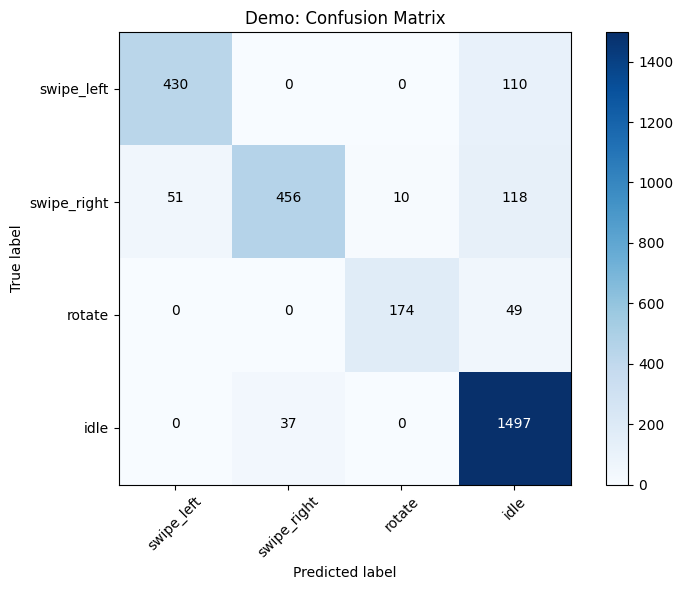

Classification Report: {'accuracy': 0.8721009549795361, 'precision': 0.8783909107475869, 'recall': 0.8721009549795361, 'f1': 0.8687981686093192, 'confusion_matrix': array([[ 430,    0,    0,  110],
       [  51,  456,   10,  118],
       [   0,    0,  174,   49],
       [   0,   37,    0, 1497]]), 'labels': ['swipe_left', 'swipe_right', 'rotate', 'idle']}


In [33]:
LABEL_TO_GESTURE = {
    0: "swipe_left", 
    1: "swipe_right", 
    2: "rotate", 
    3: "idle"
}
# Generate predictions for the validation set.
val_preds = trained_model.predict(X_val)

# Generate and display the classification report (with confusion matrix visualization).
print("Generating classification report for the trained model...")
report = classification_report(
    y_true=y_val, 
    y_pred=val_preds, 
    label_mapping=LABEL_TO_GESTURE, 
    visualize_cm=True, 
    title="Demo: Confusion Matrix"
)
print("Classification Report:", report)